In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from keras import layers, models
from keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D, BatchNormalization, ReLU
from keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

from sklearn.metrics import classification_report

tf.random.set_seed(23)

import os
import cv2
import random
import warnings
warnings.filterwarnings('ignore')

2024-04-23 13:57:08.325900: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-23 13:57:08.326028: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-23 13:57:08.455011: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# !pip install tensorflow[and-cuda]
# !pip install tensorflow[and-cuda]==2.13.0 --user

In [3]:
train_path = '/kaggle/input/pneumonia-tuberculosis-normal/Train'
test_path = '/kaggle/input/pneumonia-tuberculosis-normal/Test'
img_width,img_height,channel = 96,96,3

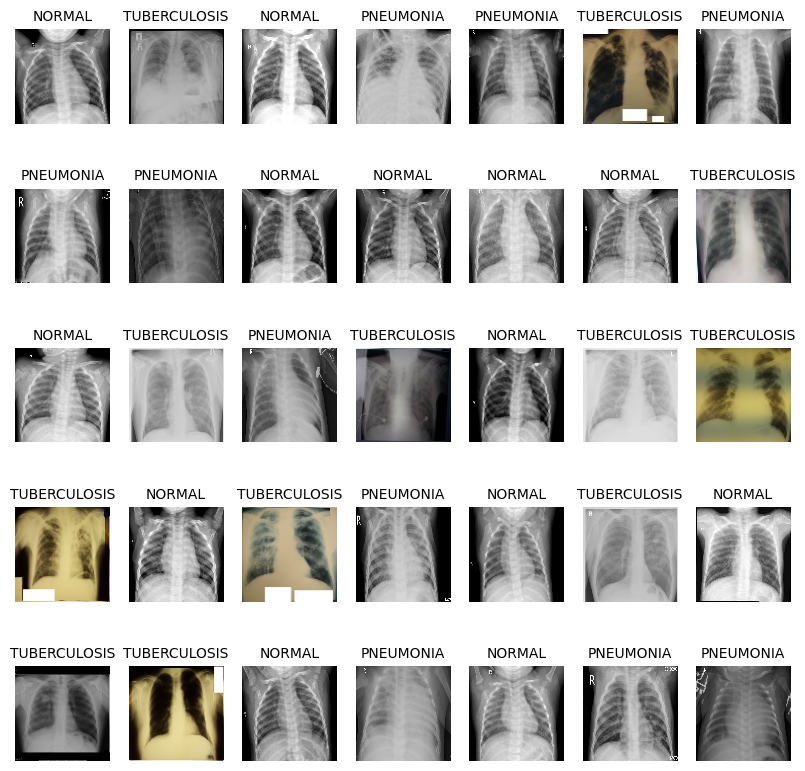

In [4]:
classes = ['PNEUMONIA','TUBERCULOSIS','NORMAL']
# we will import the train data , using this code
def import_data(dataset, path, categories):
    for i in categories:
        full_path = os.path.join(path,i)
        label = categories.index(i)
        for j in os.listdir(full_path):
            try:
                img = cv2.imread(os.path.join(full_path,j))
                img_resized = cv2.resize(img,(img_width,img_height))
                dataset.append([img_resized,label])
            except :
                pass
    random.shuffle(dataset)
    
# creating the dataset

train_df = []
import_data(train_df,train_path,classes)
train_df = pd.DataFrame(train_df,columns=['image','label'])
train_stack = np.stack(train_df.image)

# Images,
plt.figure(figsize=(10,10))
for i in range(35):
    plt.subplot(5,7,i+1)
    plt.imshow(train_df.image[i])
    plt.title(classes[train_df.label[i]],size=10)
    plt.axis('off')

In [5]:
# Train dataset
train_df.head(5)

,image,label
0,"[[[46, 46, 46], [34, 34, 34], [21, 21, 21], [0...",2
1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",1
2,"[[[48, 48, 48], [72, 72, 72], [81, 81, 81], [1...",2
3,"[[[205, 205, 205], [192, 192, 192], [193, 193,...",0
4,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [2, 2, 2], ...",0


In [6]:
train_df.label.value_counts()

label
2    700
0    700
1    655
Name: count, dtype: int64

In [7]:
# Loading the pretrained models :
from tensorflow.keras.applications import VGG16, VGG19, ResNet50, ResNet101, InceptionV3, MobileNet, Xception, NASNetMobile
from tensorflow.keras.applications import DenseNet121, EfficientNetB0

#DenseNet121---------------------------------------------->
densenet121 = DenseNet121(
    include_top = False,
    weights='imagenet',
    input_shape = (img_width,img_height,3))

densenet121.trainable = False

#EfficientNetB0------------------------------------------->
efficientnetB0 = EfficientNetB0(
    include_top = False,
    weights='imagenet',
    input_shape = (img_width,img_height,3))

efficientnetB0.trainable = False

#InceptionV3---------------------------------------------->
inceptionv3 = InceptionV3(
    include_top = False,
    weights='imagenet',
    input_shape = (img_width,img_height,3))

inceptionv3.trainable = False

#MobileNet----------------------------------------------->
mobilenet = MobileNet(
    include_top = False,
    weights='imagenet',
    input_shape = (img_width,img_height,3))

mobilenet.trainable = False

#Xception----------------------------------------------->
xception = Xception(
    include_top = False,
    weights='imagenet',
    input_shape = (img_width,img_height,3))

xception.trainable = False

#NASNetMobile--------------------------------------------->
nasnetmobile = NASNetMobile(
    include_top = False,
    weights='imagenet',
    input_shape = (img_width,img_height,3))

nasnetmobile.trainable = False

#vgg16--------------------------------------------------->
vgg16 = VGG16(
    include_top = False,
    weights='imagenet',
    input_shape = (img_width,img_height,3))

vgg16.trainable = False

#vgg19-------------------------------------------------->
vgg19 = VGG19(
    include_top = False,
    weights='imagenet',
    input_shape = (img_width,img_height,3))

vgg19.trainable = False

#Resnet50----------------------------------------------->
resnet50 = ResNet50(
    include_top = False,
    weights='imagenet',
    input_shape = (img_width,img_height,3))

resnet50.trainable = False

#Resnet101----------------------------------------------->
resnet101 = ResNet101(
    include_top = False,
    weights='imagenet',
    input_shape = (img_width,img_height,3))

resnet101.trainable = False


29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
19993432/19993432 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
171446536/171446536 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [8]:
# model_1 NASNetMobile 

# let's build and train the model 
model_1 = Sequential()
model_1.add(nasnetmobile)
#ann layers
model_1.add(layers.Flatten())

model_1.add(layers.BatchNormalization())
model_1.add(layers.Dense(units=128,activation='relu', kernel_regularizer = keras.regularizers.l2(0.04)))
model_1.add(layers.Dropout(0.2))



#no of classes is 3
model_1.add(layers.Dense(units=3,activation='softmax'))

model_1.compile(optimizer=Adam(learning_rate=0.01), loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])


model_1.fit(train_stack,train_df.label,epochs=20, validation_split = 0.2)

Epoch 1/20
 3/52 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.5365 - loss: 9.6962   

I0000 00:00:1713880755.717547      90 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1713880755.816824      90 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step - accuracy: 0.7050 - loss: 7.7504

W0000 00:00:1713880772.234763      90 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1713880786.126719      90 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


52/52 ━━━━━━━━━━━━━━━━━━━━ 81s 808ms/step - accuracy: 0.7059 - loss: 7.7106 - val_accuracy: 0.5645 - val_loss: 4.3069
Epoch 2/20
 5/52 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.7949 - loss: 2.2020

W0000 00:00:1713880797.033886      89 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.7793 - loss: 2.0389 - val_accuracy: 0.8102 - val_loss: 1.1614
Epoch 3/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8134 - loss: 1.2320 - val_accuracy: 0.7810 - val_loss: 1.0852
Epoch 4/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8021 - loss: 1.1836 - val_accuracy: 0.7810 - val_loss: 1.0417
Epoch 5/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8039 - loss: 1.1851 - val_accuracy: 0.8370 - val_loss: 1.0733
Epoch 6/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8223 - loss: 1.1979 - val_accuracy: 0.8224 - val_loss: 1.2522
Epoch 7/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8166 - loss: 1.2939 - val_accuracy: 0.8029 - val_loss: 1.0937
Epoch 8/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8189 - loss: 1.1464 - val_accuracy: 0.8370 - val_loss: 1.0475
Epoch 9/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8313 - loss: 1.0792 - val_accuracy: 0.8418 - val_loss: 1.

<Axes: title={'center': 'NASNetMobile'}>

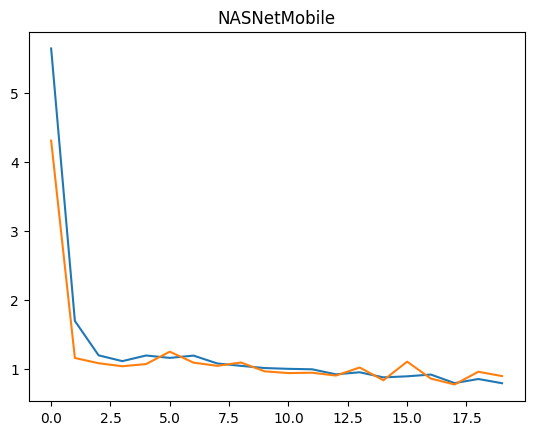

In [9]:
plt.title('NASNetMobile')
sns.lineplot(model_1.history.history['loss'])
sns.lineplot(model_1.history.history['val_loss'])

In [10]:
# model_2 EfficientNetB0

# let's build and train the model 
model_2 = Sequential()
model_2.add(efficientnetB0)
#ann layers
model_2.add(layers.Flatten())

# model_2.add(layers.BatchNormalization())
model_2.add(layers.Dense(units=256,activation='relu'))
model_2.add(layers.Dropout(0.4 ))



#no of classes is 3
model_2.add(layers.Dense(units=3,activation='softmax'))
model_2.compile(optimizer=Adam(learning_rate=0.0009), loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

model_2.fit(train_stack,train_df.label,epochs=20, validation_split = 0.2)

Epoch 1/20
12/52 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6436 - loss: 1.5573

W0000 00:00:1713880854.718540      90 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step - accuracy: 0.7914 - loss: 0.8815

W0000 00:00:1713880875.644322      89 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1713880881.708348      89 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


52/52 ━━━━━━━━━━━━━━━━━━━━ 66s 659ms/step - accuracy: 0.7929 - loss: 0.8736 - val_accuracy: 0.9611 - val_loss: 0.1333
Epoch 2/20
 9/52 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9289 - loss: 0.1671

W0000 00:00:1713880888.309995      92 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9306 - loss: 0.1651 - val_accuracy: 0.9465 - val_loss: 0.1279
Epoch 3/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9324 - loss: 0.1524 - val_accuracy: 0.9489 - val_loss: 0.1177
Epoch 4/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9570 - loss: 0.1218 - val_accuracy: 0.9708 - val_loss: 0.1035
Epoch 5/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9602 - loss: 0.1059 - val_accuracy: 0.9659 - val_loss: 0.1072
Epoch 6/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9711 - loss: 0.0753 - val_accuracy: 0.9538 - val_loss: 0.1330
Epoch 7/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9620 - loss: 0.0992 - val_accuracy: 0.9611 - val_loss: 0.1190
Epoch 8/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9644 - loss: 0.0873 - val_accuracy: 0.9757 - val_loss: 0.1076
Epoch 9/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9707 - loss: 0.0662 - val_accuracy: 0.9684 - val_loss: 0.

<Axes: title={'center': 'EfficientNetB0'}>

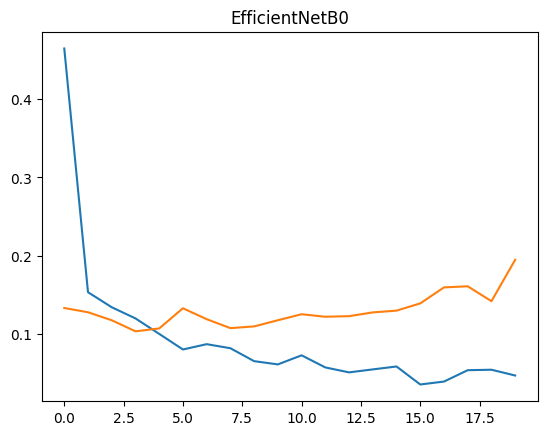

In [11]:
plt.title('EfficientNetB0')
sns.lineplot(model_2.history.history['loss'])
sns.lineplot(model_2.history.history['val_loss'])

In [12]:
# model_3 vgg16
# let's build and train the model 
model_3 = Sequential()
model_3.add(vgg16)
# ann layers
model_3.add(layers.Flatten())

model_3.add(layers.BatchNormalization())
model_3.add(layers.Dense(units=128,activation='relu',kernel_regularizer = keras.regularizers.l2(0.04)))
model_3.add(layers.Dropout(0.57))

model_3.add(layers.BatchNormalization())
model_3.add(layers.Dense(units=64,activation='relu'))
model_3.add(layers.Dropout(0.5))

#no of classes is 3
model_3.add(layers.Dense(units=3,activation='softmax'))

model_3.compile(optimizer=Adam(learning_rate=0.0007), loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])


model_3.fit(train_stack,train_df.label,epochs=20, validation_split = 0.2)

Epoch 1/20
 5/52 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.3333 - loss: 11.3051

W0000 00:00:1713880915.905100      91 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - accuracy: 0.6123 - loss: 8.9295

W0000 00:00:1713880924.964707      90 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1713880925.985823      90 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


52/52 ━━━━━━━━━━━━━━━━━━━━ 31s 343ms/step - accuracy: 0.6151 - loss: 8.8969 - val_accuracy: 0.9367 - val_loss: 4.6350
Epoch 2/20
 5/52 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9173 - loss: 4.6042

W0000 00:00:1713880933.394276      90 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9044 - loss: 4.0269 - val_accuracy: 0.9513 - val_loss: 2.3569
Epoch 3/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9402 - loss: 2.0981 - val_accuracy: 0.9513 - val_loss: 1.3284
Epoch 4/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9528 - loss: 1.2122 - val_accuracy: 0.9611 - val_loss: 0.8639
Epoch 5/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9559 - loss: 0.8249 - val_accuracy: 0.9659 - val_loss: 0.6703
Epoch 6/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9503 - loss: 0.6574 - val_accuracy: 0.9586 - val_loss: 0.6042
Epoch 7/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9506 - loss: 0.6322 - val_accuracy: 0.9586 - val_loss: 0.6309
Epoch 8/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9601 - loss: 0.6261 - val_accuracy: 0.9489 - val_loss: 0.6452
Epoch 9/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9606 - loss: 0.6178 - val_accuracy: 0.9465 - val_loss: 0.

<Axes: title={'center': 'VGG16'}>

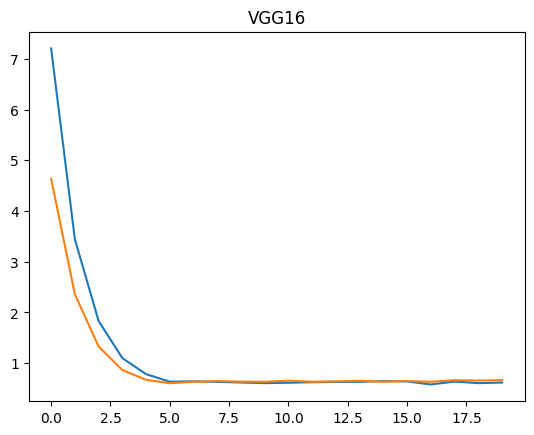

In [13]:
plt.title('VGG16')
sns.lineplot(model_3.history.history['loss'])
sns.lineplot(model_3.history.history['val_loss'])

In [14]:
# model_4 vgg19
# let's build and train the model 
model_4 = Sequential()
model_4.add(vgg19)
#ann layers
model_4.add(layers.Flatten())

model_4.add(layers.BatchNormalization())
model_4.add(layers.Dense(units=128,activation='relu', kernel_regularizer = keras.regularizers.l2(0.04)))
model_4.add(layers.Dropout(0.5))

model_4.add(layers.BatchNormalization())
model_4.add(layers.Dense(units=128,activation='relu', kernel_regularizer = keras.regularizers.l2(0.04)))
model_4.add(layers.Dropout(0.5))

#no of classes is 3
model_4.add(layers.Dense(units=3,activation='softmax'))

model_4.compile(optimizer=Adam(learning_rate=0.0007), loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

model_4.fit(train_stack,train_df.label,epochs=20, validation_split = 0.2)

Epoch 1/20
 3/52 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.2587 - loss: 16.7223

W0000 00:00:1713880976.471603      90 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.6576 - loss: 13.6380

W0000 00:00:1713880982.122202      91 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1713880983.220125      91 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


52/52 ━━━━━━━━━━━━━━━━━━━━ 14s 154ms/step - accuracy: 0.6604 - loss: 13.5969 - val_accuracy: 0.9392 - val_loss: 7.9611
Epoch 2/20
 5/52 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9404 - loss: 7.8331

W0000 00:00:1713880984.341123      91 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.9310 - loss: 6.8504 - val_accuracy: 0.9562 - val_loss: 4.1021
Epoch 3/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.9492 - loss: 3.5693 - val_accuracy: 0.9611 - val_loss: 2.2018
Epoch 4/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.9681 - loss: 1.9040 - val_accuracy: 0.9659 - val_loss: 1.2608
Epoch 5/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.9713 - loss: 1.0934 - val_accuracy: 0.9586 - val_loss: 0.8224
Epoch 6/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.9776 - loss: 0.7119 - val_accuracy: 0.9732 - val_loss: 0.5820
Epoch 7/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.9727 - loss: 0.5317 - val_accuracy: 0.9562 - val_loss: 0.5241
Epoch 8/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.9783 - loss: 0.4590 - val_accuracy: 0.9513 - val_loss: 0.4775
Epoch 9/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.9788 - loss: 0.4067 - val_accuracy: 0.9562 - val_loss: 0.

<Axes: title={'center': 'VGG19'}>

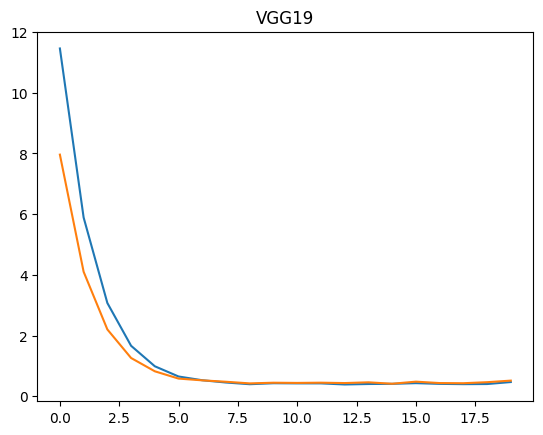

In [15]:
plt.title('VGG19')
sns.lineplot(model_4.history.history['loss'])
sns.lineplot(model_4.history.history['val_loss'])

In [16]:
# model_5 resnet50

# let's build and train the model 
model_5 = Sequential()
model_5.add(resnet50)
#ann layers
model_5.add(layers.Flatten())

model_5.add(layers.BatchNormalization())
model_5.add(layers.Dense(units=64,activation='relu',kernel_regularizer = keras.regularizers.l2(0.04)))
model_5.add(layers.Dropout(0.6))


model_5.add(layers.Dense(units=3,activation='softmax'))

model_5.compile(optimizer=Adam(learning_rate=0.0006), loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])


model_5.fit(train_stack,train_df.label,epochs=20, validation_split = 0.2)

Epoch 1/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 31s 318ms/step - accuracy: 0.7985 - loss: 5.5560 - val_accuracy: 0.9684 - val_loss: 3.9337
Epoch 2/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9350 - loss: 3.7935 - val_accuracy: 0.9635 - val_loss: 2.7464
Epoch 3/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9468 - loss: 2.6759 - val_accuracy: 0.9586 - val_loss: 2.0289
Epoch 4/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9620 - loss: 1.8552 - val_accuracy: 0.9659 - val_loss: 1.4639
Epoch 5/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9554 - loss: 1.4083 - val_accuracy: 0.9611 - val_loss: 1.2421
Epoch 6/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9566 - loss: 1.2295 - val_accuracy: 0.9586 - val_loss: 1.1004
Epoch 7/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9721 - loss: 0.9637 - val_accuracy: 0.9538 - val_loss: 0.8799
Epoch 8/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9662 - loss: 0.8347 - val_accuracy: 0.9586 -

<Axes: title={'center': 'Resnet50'}>

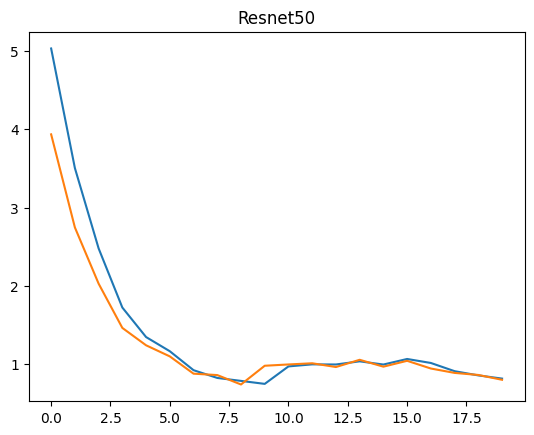

In [17]:
plt.title('Resnet50')
sns.lineplot(model_5.history.history['loss'])
sns.lineplot(model_5.history.history['val_loss'])

In [18]:
# model_6 Resnet101
 
# let's build and train the model 
model_6 = Sequential()
model_6.add(resnet101)
#ann layers
model_6.add(layers.Flatten())

# model_6.add(layers.BatchNormalization())
model_6.add(layers.Dense(units=64,activation='relu'))
model_6.add(layers.Dropout(0.4))


#no of classes is 3
model_6.add(layers.Dense(units=3,activation='softmax'))

model_6.compile(optimizer=Adam(learning_rate=0.0009), loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])


model_6.fit(train_stack,train_df.label,epochs=20, validation_split = 0.2)

Epoch 1/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 38s 369ms/step - accuracy: 0.7105 - loss: 3.5383 - val_accuracy: 0.9294 - val_loss: 0.1950
Epoch 2/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.9161 - loss: 0.2292 - val_accuracy: 0.9343 - val_loss: 0.1883
Epoch 3/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.9296 - loss: 0.2072 - val_accuracy: 0.9392 - val_loss: 0.1766
Epoch 4/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.9380 - loss: 0.1631 - val_accuracy: 0.9440 - val_loss: 0.1427
Epoch 5/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.9499 - loss: 0.1319 - val_accuracy: 0.9513 - val_loss: 0.1400
Epoch 6/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.9466 - loss: 0.1250 - val_accuracy: 0.9562 - val_loss: 0.1454
Epoch 7/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.9566 - loss: 0.1349 - val_accuracy: 0.9392 - val_loss: 0.1770
Epoch 8/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.9576 - loss: 0.1102 - val_accuracy: 0.9538 -

<Axes: title={'center': 'Resnet101'}>

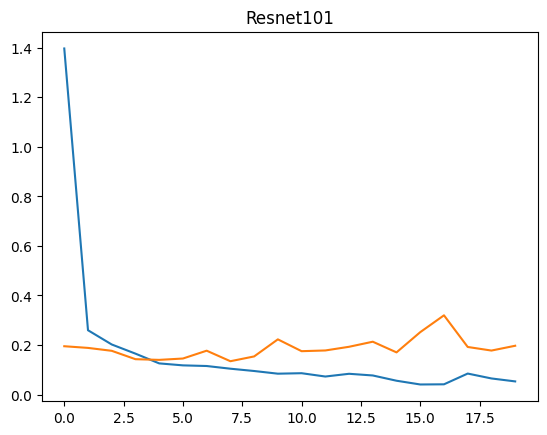

In [19]:
plt.title('Resnet101')
sns.lineplot(model_6.history.history['loss'])
sns.lineplot(model_6.history.history['val_loss'])

In [20]:
# model_7 DenseNet121

# let's build and train the model 
model_7 = Sequential()
model_7.add(densenet121)
#ann layers
model_7.add(layers.Flatten())

# model.add(layers.BatchNormalization())
model_7.add(layers.Dense(units=128,activation='relu',kernel_regularizer = keras.regularizers.l2(0.04)))
model_7.add(layers.Dropout(0.2))


#no of classes is 3
model_7.add(layers.Dense(units=3,activation='softmax'))

model_7.compile(optimizer=Adam(learning_rate=0.0009), loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])


model_7.fit(train_stack,train_df.label,epochs=20, validation_split = 0.2)

Epoch 1/20
 5/52 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.3714 - loss: 29.7866

W0000 00:00:1713881204.944338      91 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step - accuracy: 0.6786 - loss: 13.8968

W0000 00:00:1713881221.262232      92 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1713881231.355387      92 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


52/52 ━━━━━━━━━━━━━━━━━━━━ 71s 775ms/step - accuracy: 0.6813 - loss: 13.7795 - val_accuracy: 0.9392 - val_loss: 3.3127
Epoch 2/20
 5/52 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9427 - loss: 3.2837

W0000 00:00:1713881244.468650      92 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9319 - loss: 3.0741 - val_accuracy: 0.9027 - val_loss: 2.4735
Epoch 3/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9089 - loss: 2.2753 - val_accuracy: 0.9319 - val_loss: 1.8437
Epoch 4/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9340 - loss: 1.7410 - val_accuracy: 0.9319 - val_loss: 1.4882
Epoch 5/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9324 - loss: 1.4135 - val_accuracy: 0.9489 - val_loss: 1.2232
Epoch 6/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9333 - loss: 1.1771 - val_accuracy: 0.9489 - val_loss: 1.0319
Epoch 7/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9465 - loss: 0.9805 - val_accuracy: 0.9465 - val_loss: 0.8977
Epoch 8/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9382 - loss: 0.8672 - val_accuracy: 0.9562 - val_loss: 0.7639
Epoch 9/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9541 - loss: 0.7273 - val_accuracy: 0.9440 - val_loss: 0.

<Axes: title={'center': 'DenseNet121'}>

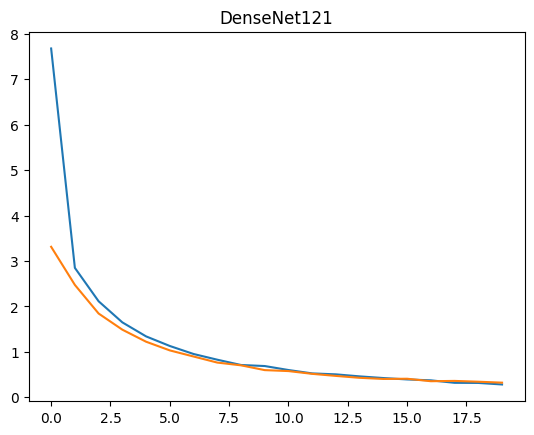

In [21]:
plt.title('DenseNet121')
sns.lineplot(model_7.history.history['loss'])
sns.lineplot(model_7.history.history['val_loss'])

In [22]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True,start_from_epoch=25)

In [23]:
# model_8  vgg16 + cnn
tf.random.set_seed(23)
# let's build and train the model 
model_8 = Sequential()
model_8.add(vgg16)
model_8.add(layers.Conv2D(32,(4,4),padding = 'same',activation = 'relu'))
model_8.add(layers.Dropout(0.2))

# ann layers
model_8.add(layers.Flatten())
model_8.add(layers.BatchNormalization())
model_8.add(layers.Dense(units=64,activation='relu',kernel_regularizer = keras.regularizers.l2(0.04)))
model_8.add(layers.Dropout(0.2))

#no of classes is 3
model_8.add(layers.Dense(units=3,activation='softmax'))
model_8.compile(optimizer=Adam(learning_rate=0.00015), loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

model_8.fit(train_stack, train_df. label,epochs=20, validation_split = 0.2, callbacks = early_stopping)

Epoch 1/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 14s 150ms/step - accuracy: 0.7260 - loss: 4.8269 - val_accuracy: 0.9002 - val_loss: 4.1566
Epoch 2/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9205 - loss: 3.9763 - val_accuracy: 0.9465 - val_loss: 3.6129
Epoch 3/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9501 - loss: 3.4944 - val_accuracy: 0.9611 - val_loss: 3.1794
Epoch 4/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9576 - loss: 3.0831 - val_accuracy: 0.9538 - val_loss: 2.8058
Epoch 5/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9709 - loss: 2.7060 - val_accuracy: 0.9562 - val_loss: 2.4657
Epoch 6/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9762 - loss: 2.3579 - val_accuracy: 0.9562 - val_loss: 2.1648
Epoch 7/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9821 - loss: 2.0474 - val_accuracy: 0.9586 - val_loss: 1.8896
Epoch 8/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9921 - loss: 1.7753 - val_accuracy: 0.9611 -

<Axes: title={'center': 'VGG16+CNN'}>

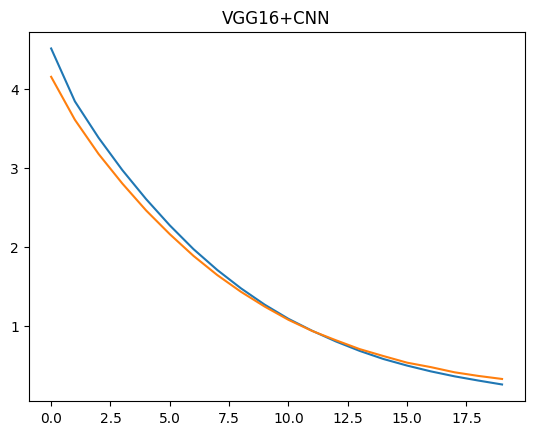

In [24]:
plt.title('VGG16+CNN')
sns.lineplot(model_8.history.history['loss'])
sns.lineplot(model_8.history.history['val_loss'])

In [25]:
# model_9 InceptionV3

# let's build and train the model 
model_9 = Sequential()
model_9.add(inceptionv3)
#ann layers
model_9.add(layers.Flatten())

model_9.add(layers.BatchNormalization())
model_9.add(layers.Dense(units=128,activation='relu', kernel_regularizer = keras.regularizers.l2(0.04)))
model_9.add(layers.Dropout(0.5))

# model.add(layers.BatchNormalization())
# model.add(layers.Dense(units=64,activation='relu'))
# model.add(layers.Dropout(0.5))

#no of classes is 3
model_9.add(layers.Dense(units=3,activation='softmax'))

model_9.compile(optimizer=Adam(learning_rate=0.0009), loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])


model_9.fit(train_stack,train_df.label,epochs=20, validation_split = 0.2)

Epoch 1/20
 7/52 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.5635 - loss: 10.9020

W0000 00:00:1713881342.043264      92 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step - accuracy: 0.7198 - loss: 9.0390

W0000 00:00:1713881352.701240      91 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1713881358.977686      91 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


52/52 ━━━━━━━━━━━━━━━━━━━━ 44s 485ms/step - accuracy: 0.7210 - loss: 9.0092 - val_accuracy: 0.7324 - val_loss: 5.5037
Epoch 2/20
 6/52 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8725 - loss: 4.6807

W0000 00:00:1713881366.796413      92 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8632 - loss: 4.1409 - val_accuracy: 0.7689 - val_loss: 3.0302
Epoch 3/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8539 - loss: 2.3545 - val_accuracy: 0.8491 - val_loss: 1.6655
Epoch 4/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8776 - loss: 1.4092 - val_accuracy: 0.8345 - val_loss: 1.1673
Epoch 5/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8709 - loss: 1.0133 - val_accuracy: 0.8613 - val_loss: 0.8585
Epoch 6/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8687 - loss: 0.8366 - val_accuracy: 0.8613 - val_loss: 0.7469
Epoch 7/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8730 - loss: 0.7417 - val_accuracy: 0.8613 - val_loss: 0.6448
Epoch 8/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8845 - loss: 0.6150 - val_accuracy: 0.8662 - val_loss: 0.5646
Epoch 9/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8894 - loss: 0.5535 - val_accuracy: 0.8759 - val_loss: 0.

<Axes: title={'center': 'InceptionV3'}>

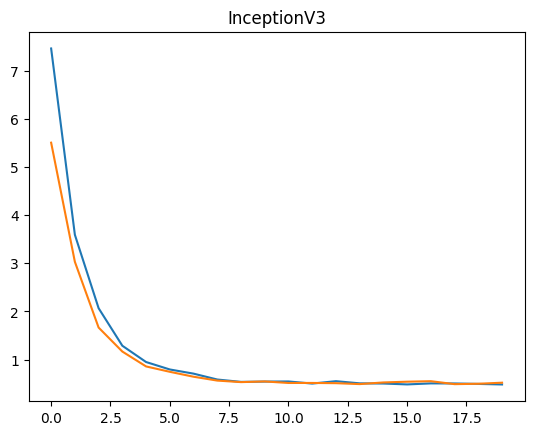

In [26]:
plt.title('InceptionV3')
sns.lineplot(model_9.history.history['loss'])
sns.lineplot(model_9.history.history['val_loss'])

In [27]:
# model_10 MobileNet

# let's build and train the model 
model_10 = Sequential()
model_10.add(mobilenet)
#ann layers
model_10.add(layers.Flatten())

# model.add(layers.BatchNormalization())
model_10.add(layers.Dense(units=128,activation='relu'))
model_10.add(layers.Dropout(0.5))

# model.add(layers.BatchNormalization())
# model.add(layers.Dense(units=64,activation='relu'))
# model.add(layers.Dropout(0.5))

#no of classes is 3
model_10.add(layers.Dense(units=3,activation='softmax'))

model_10.compile(optimizer=Adam(learning_rate=0.0009), loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])


model_10.fit(train_stack,train_df.label,epochs=20, validation_split = 0.2)

Epoch 1/20
25/52 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5417 - loss: 3.3772

W0000 00:00:1713881392.551940      89 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.6475 - loss: 2.2696

W0000 00:00:1713881396.227532      92 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1713881398.236538      90 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


52/52 ━━━━━━━━━━━━━━━━━━━━ 15s 155ms/step - accuracy: 0.6501 - loss: 2.2452 - val_accuracy: 0.9197 - val_loss: 0.2265
Epoch 2/20
25/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8782 - loss: 0.2992

W0000 00:00:1713881400.434718      90 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8945 - loss: 0.2688 - val_accuracy: 0.9270 - val_loss: 0.1780
Epoch 3/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9112 - loss: 0.2350 - val_accuracy: 0.9270 - val_loss: 0.1794
Epoch 4/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9297 - loss: 0.2035 - val_accuracy: 0.9319 - val_loss: 0.1683
Epoch 5/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9367 - loss: 0.1846 - val_accuracy: 0.9319 - val_loss: 0.1635
Epoch 6/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9209 - loss: 0.2045 - val_accuracy: 0.9392 - val_loss: 0.1569
Epoch 7/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9461 - loss: 0.1528 - val_accuracy: 0.9367 - val_loss: 0.1520
Epoch 8/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9278 - loss: 0.1571 - val_accuracy: 0.9367 - val_loss: 0.1493
Epoch 9/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9425 - loss: 0.1483 - val_accuracy: 0.9416 - val_loss: 0.1507
Epo

<Axes: title={'center': 'MobileNet'}>

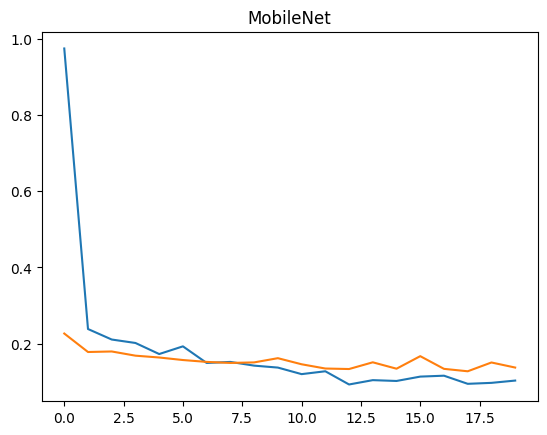

In [28]:
plt.title('MobileNet')
sns.lineplot(model_10.history.history['loss'])
sns.lineplot(model_10.history.history['val_loss'])

In [29]:
# model_11 Xception

# let's build and train the model 
model_11 = Sequential()
model_11.add(xception)
#ann layers
model_11.add(layers.Flatten())

model_11.add(layers.BatchNormalization())
model_11.add(layers.Dense(units=128,activation='relu', kernel_regularizer = keras.regularizers.l2(0.04)))
model_11.add(layers.Dropout(0.3))

# model.add(layers.BatchNormalization())
model_11.add(layers.Dense(units=128,activation='relu'))
model_11.add(layers.Dropout(0.3))

#no of classes is 3
model_11.add(layers.Dense(units=3,activation='softmax'))

model_11.compile(optimizer=Adam(learning_rate=0.0009), loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])


model_11.fit(train_stack,train_df.label,epochs=20, validation_split = 0.2)

Epoch 1/20
 5/52 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.6819 - loss: 10.5998

W0000 00:00:1713881424.079533      89 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - accuracy: 0.7228 - loss: 8.1154

W0000 00:00:1713881433.012703      91 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1713881436.204542      92 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


52/52 ━━━━━━━━━━━━━━━━━━━━ 32s 341ms/step - accuracy: 0.7236 - loss: 8.0837 - val_accuracy: 0.6691 - val_loss: 7.0593
Epoch 2/20
 6/52 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8668 - loss: 4.0597

W0000 00:00:1713881441.488719      89 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.8228 - loss: 3.7470 - val_accuracy: 0.8662 - val_loss: 2.3778
Epoch 3/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.8359 - loss: 2.3383 - val_accuracy: 0.8516 - val_loss: 2.0047
Epoch 4/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.8472 - loss: 1.8398 - val_accuracy: 0.8881 - val_loss: 1.3063
Epoch 5/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.8421 - loss: 1.4959 - val_accuracy: 0.9197 - val_loss: 1.1915
Epoch 6/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.8454 - loss: 1.3979 - val_accuracy: 0.9027 - val_loss: 1.2038
Epoch 7/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.8506 - loss: 1.3420 - val_accuracy: 0.8954 - val_loss: 1.1721
Epoch 8/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.8456 - loss: 1.4185 - val_accuracy: 0.9246 - val_loss: 1.0306
Epoch 9/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.8573 - loss: 1.1177 - val_accuracy: 0.9148 - val_loss: 0.

<Axes: title={'center': 'Xception'}>

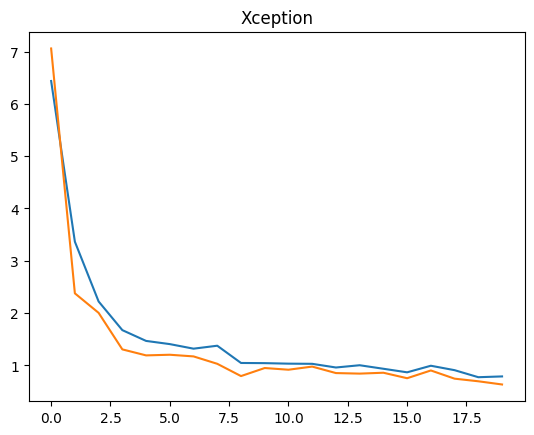

In [30]:
plt.title('Xception')
sns.lineplot(model_11.history.history['loss'])
sns.lineplot(model_11.history.history['val_loss'])

In [31]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True,start_from_epoch=25)

In [32]:
# model_12  VGG16+ 2CNN

# let's build and train the model 
model_12 = Sequential()
model_12.add(vgg16)
model_12.add(layers.Conv2D(32,(3,3),padding='same',
                           activation = 'relu',
                           kernel_regularizer = keras.regularizers.l2(0.04)))
model_12.add(layers.Dropout(0.4))
model_12.add(layers.Conv2D(32,(5,5),padding='same',
                           activation = 'relu',
                           kernel_regularizer = keras.regularizers.l2(0.04)))
model_12.add(layers.Dropout(0.4))
# ann layers
model_12.add(layers.Flatten())
model_12.add(layers.BatchNormalization())
model_12.add(layers.Dense(units=64,activation='relu',kernel_regularizer = keras.regularizers.l2(0.04)))
model_12.add(layers.Dropout(0.5))

#no of classes is 3
model_12.add(layers.Dense(units=3,activation='softmax'))
model_12.compile(optimizer=Adam(learning_rate=0.00015),
                 loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

model_12.fit(train_stack,train_df.label,epochs=80, validation_split = 0.2, callbacks= early_stopping)


Epoch 1/80
52/52 ━━━━━━━━━━━━━━━━━━━━ 19s 194ms/step - accuracy: 0.4177 - loss: 9.1464 - val_accuracy: 0.8224 - val_loss: 7.7597
Epoch 2/80
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.6057 - loss: 8.1041 - val_accuracy: 0.8978 - val_loss: 7.0978
Epoch 3/80
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.7622 - loss: 7.2651 - val_accuracy: 0.9294 - val_loss: 6.5453
Epoch 4/80
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.7904 - loss: 6.7324 - val_accuracy: 0.9416 - val_loss: 6.0765
Epoch 5/80
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.8406 - loss: 6.1946 - val_accuracy: 0.9465 - val_loss: 5.6460
Epoch 6/80
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.8685 - loss: 5.7423 - val_accuracy: 0.9392 - val_loss: 5.2545
Epoch 7/80
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.8748 - loss: 5.3322 - val_accuracy: 0.9513 - val_loss: 4.8734
Epoch 8/80
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9046 - loss: 4.9087 - val_accuracy: 0.9489 -

<Axes: title={'center': 'VGG16+ 2CNN'}>

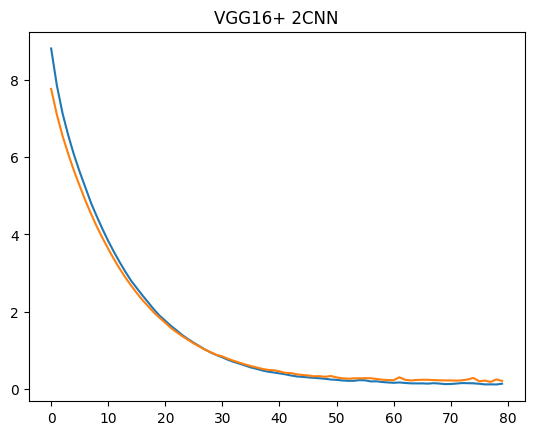

In [33]:
plt.title('VGG16+ 2CNN')
sns.lineplot(model_12.history.history['loss'])
sns.lineplot(model_12.history.history['val_loss'])


In [34]:
models = [model_1,model_2,model_3,model_4,model_5,model_6,model_7,model_8,model_9,model_10,model_11,model_12]
models_name = {model_1:'NASNetMobile', model_2:'EfficientNetB0', model_3:'VGG16',
               model_4:'VGG19', model_5:'Resnet50', model_6:'Resnet101', model_7:'DenseNet121',
               model_8:'VGG16+CNN',model_9:'InceptionV3',model_10:'MobileNet', model_11:'Xception',
               model_12:'VGG16+ 2CNN'}

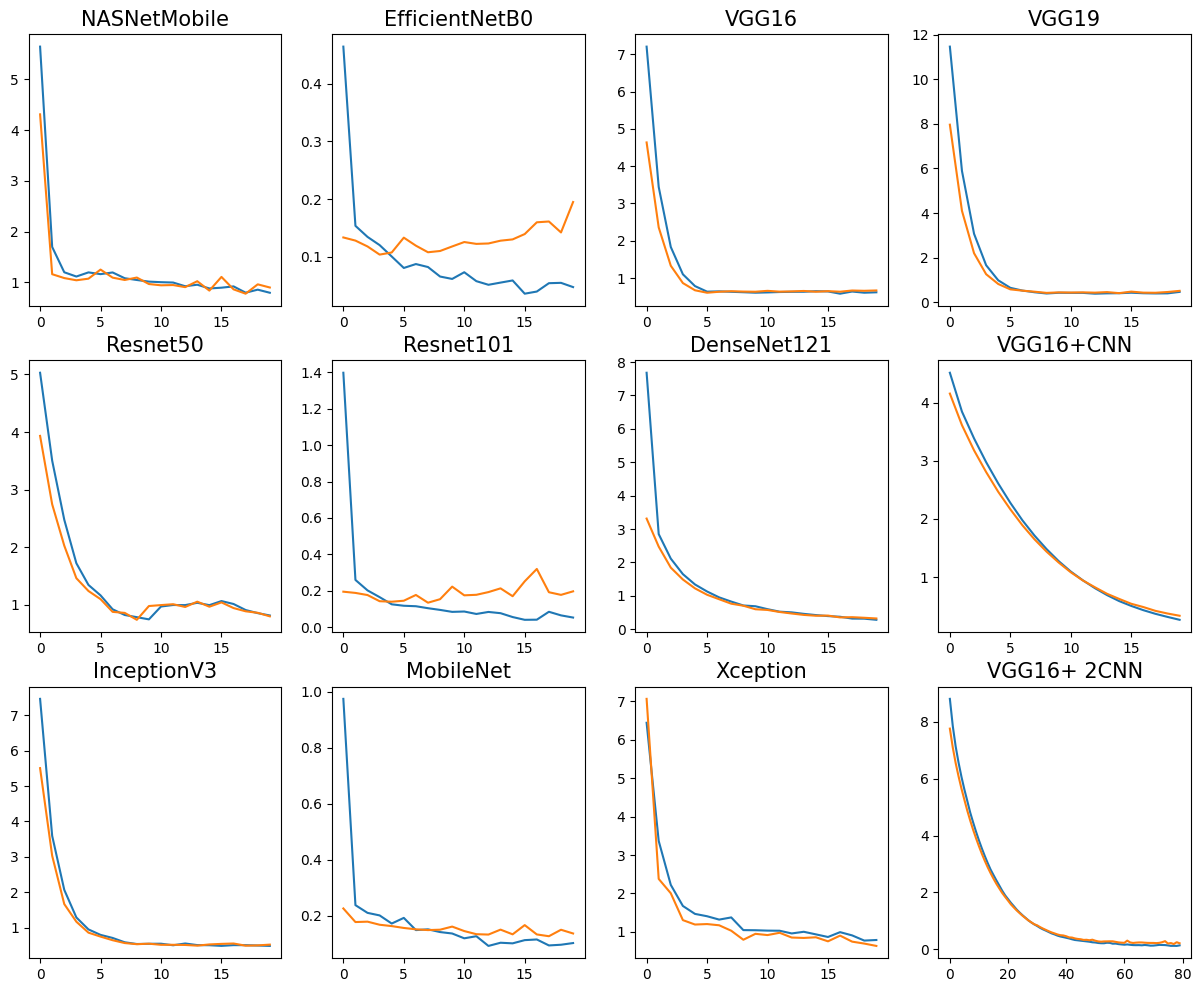

In [35]:
plt.figure(figsize = (15,12))

for i in range(len(models)):
    # creating 12 subplots as we have 12 models
    plt.subplot(3,4,i+1)
    plt.title(f'{models_name[models[i]]}',size=15)
    sns.lineplot(models[i].history.history['loss'])
    sns.lineplot(models[i].history.history['val_loss'])

In [36]:
# Now we will do the predictions on the test data:

test_df = []
import_data(test_df, test_path, classes)
test_df = pd.DataFrame(test_df,columns=['image','label'])
test_stack = np.stack(test_df.image)

In [37]:
#let's print the test dataset
test_df.head(5)

,image,label
0,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",1
1,"[[[16, 16, 16], [16, 16, 16], [15, 15, 15], [1...",0
2,"[[[17, 17, 17], [19, 19, 19], [22, 22, 22], [2...",0
3,"[[[91, 91, 91], [93, 93, 93], [112, 112, 112],...",2
4,"[[[219, 219, 219], [219, 219, 219], [218, 218,...",1


In [38]:
# importing some performance metrices :
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [39]:
def  prediction(model,test_stack = test_stack, test_df = test_df):
    ''' we will take the different models and do the predictions '''
    
    output = model.predict(test_stack)
    prediction = [np.argmax(i) for i in output]
    print("-"*60)
    print(f'Model Name - {models_name[model]}')
    print(f'Accuracy Score : {accuracy_score(test_df.label,prediction)}')
    print(f'Precision Score : {precision_score(test_df.label,prediction, average="weighted")}')
    print(f'Recall Score : {recall_score(test_df.label,prediction, average="weighted")}')
    print(f'F1 Score : {f1_score(test_df.label,prediction, average="weighted")}')
    print()
    
for i in models:
    prediction(i)

4/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step

W0000 00:00:1713881678.105875      92 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


5/5 ━━━━━━━━━━━━━━━━━━━━ 30s 4s/step


W0000 00:00:1713881694.967547      92 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


------------------------------------------------------------
Model Name - NASNetMobile
Accuracy Score : 0.8417721518987342
Precision Score : 0.8547814554036395
Recall Score : 0.8417721518987342
F1 Score : 0.8375510092651935

1/5 ━━━━━━━━━━━━━━━━━━━━ 21s 5s/step

W0000 00:00:1713881700.536243      91 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


5/5 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step


W0000 00:00:1713881709.457863      91 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


------------------------------------------------------------
Model Name - EfficientNetB0
Accuracy Score : 0.9493670886075949
Precision Score : 0.9534106891701828
Recall Score : 0.9493670886075949
F1 Score : 0.9494676504971528

3/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step 

W0000 00:00:1713881710.258316      89 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step 


W0000 00:00:1713881717.663762      89 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


------------------------------------------------------------
Model Name - VGG16
Accuracy Score : 0.9810126582278481
Precision Score : 0.9811535856565325
Recall Score : 0.9810126582278481
F1 Score : 0.9810268762223525

4/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step 

W0000 00:00:1713881718.495622      91 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 216ms/step


W0000 00:00:1713881719.356968      89 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


------------------------------------------------------------
Model Name - VGG19
Accuracy Score : 0.9746835443037974
Precision Score : 0.9751955813719235
Recall Score : 0.9746835443037974
F1 Score : 0.9747171986151251

5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step
------------------------------------------------------------
Model Name - Resnet50
Accuracy Score : 0.9746835443037974
Precision Score : 0.9758874650887343
Recall Score : 0.9746835443037974
F1 Score : 0.9745561926729256

5/5 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step
------------------------------------------------------------
Model Name - Resnet101
Accuracy Score : 0.9683544303797469
Precision Score : 0.968512184964095
Recall Score : 0.9683544303797469
F1 Score : 0.9683781270372542

4/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step

W0000 00:00:1713881754.037105      89 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


5/5 ━━━━━━━━━━━━━━━━━━━━ 27s 4s/step


W0000 00:00:1713881770.862470      92 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


------------------------------------------------------------
Model Name - DenseNet121
Accuracy Score : 0.9683544303797469
Precision Score : 0.9703588889845671
Recall Score : 0.9683544303797469
F1 Score : 0.9681859624299014

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 269ms/step
------------------------------------------------------------
Model Name - VGG16+CNN
Accuracy Score : 0.9810126582278481
Precision Score : 0.9811535856565325
Recall Score : 0.9810126582278481
F1 Score : 0.9810268762223525

4/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

W0000 00:00:1713881778.529880      91 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


5/5 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step


W0000 00:00:1713881788.563688      89 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


------------------------------------------------------------
Model Name - InceptionV3
Accuracy Score : 0.8734177215189873
Precision Score : 0.8741195116587918
Recall Score : 0.8734177215189873
F1 Score : 0.8735963379164838

1/5 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step

W0000 00:00:1713881790.353456      89 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 984ms/step


W0000 00:00:1713881794.288186      92 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


------------------------------------------------------------
Model Name - MobileNet
Accuracy Score : 0.9556962025316456
Precision Score : 0.9561328554380805
Recall Score : 0.9556962025316456
F1 Score : 0.9555331302458445

3/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step

W0000 00:00:1713881797.207533      91 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step 
------------------------------------------------------------
Model Name - Xception
Accuracy Score : 0.930379746835443
Precision Score : 0.9319353394185859
Recall Score : 0.930379746835443
F1 Score : 0.9301173213569213

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 284ms/step
------------------------------------------------------------
Model Name - VGG16+ 2CNN
Accuracy Score : 0.9746835443037974
Precision Score : 0.9746835443037974
Recall Score : 0.9746835443037974
F1 Score : 0.9746835443037974



#### Observation :
* Densenet121, VGG16 with CNN's are performing best.
* Achieved a accuracy of 98.10% 

In [40]:
plot_number = 0
def  plot_confusion_matrix(model,test_stack = test_stack, test_df = test_df):
    ''' we will Print the confusion matrix '''
    
    output = model.predict(test_stack)
    prediction = [np.argmax(i) for i in output]
    accuracy = accuracy_score(test_df.label,prediction)
    # where the accuracy is more than 94% we will show the CM as blue...
    if accuracy > 0.94:
        cmap = 'Blues'
    else :
        cmap = 'Reds'
    cm = confusion_matrix(test_df.label, prediction)
    sns.heatmap(cm, annot=True, cmap=cmap, fmt='g')  
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix - {models_name[model]}')
    plt.show()

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


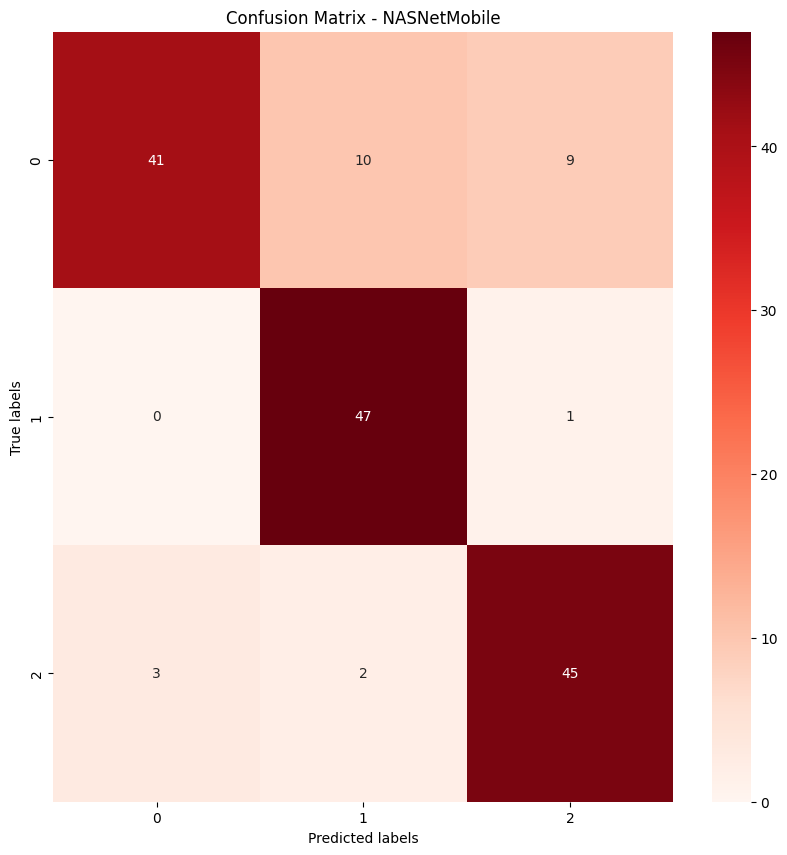

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


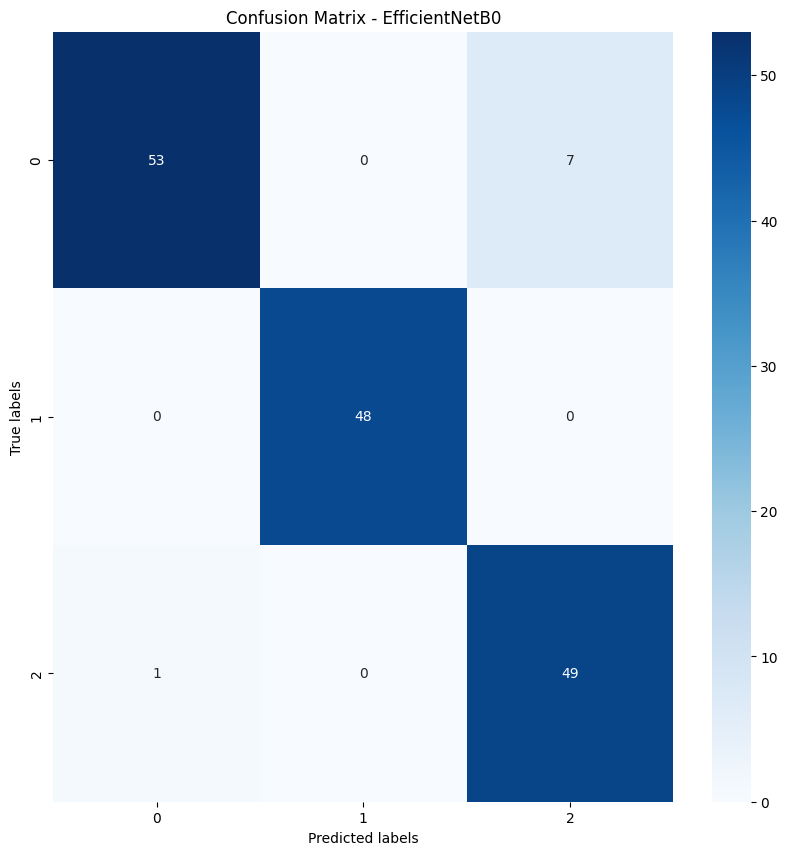

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


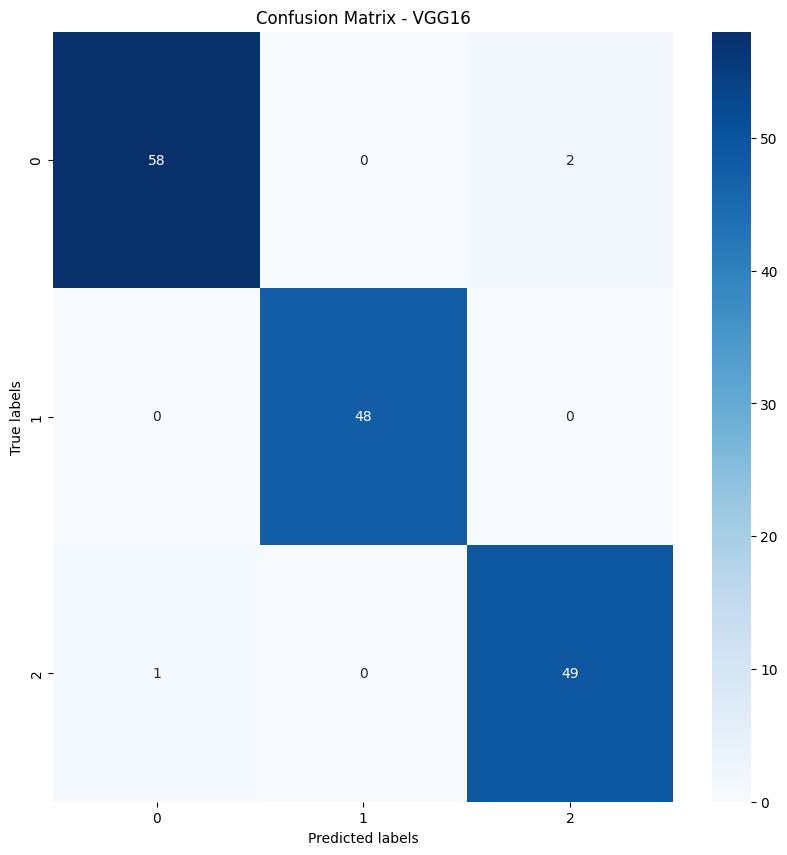

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


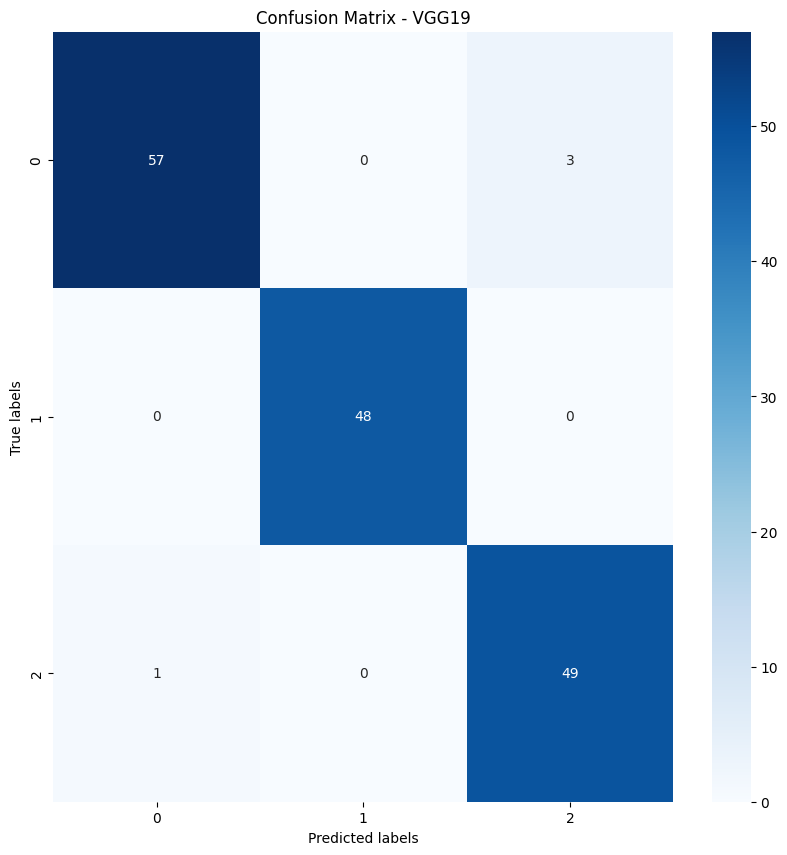

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


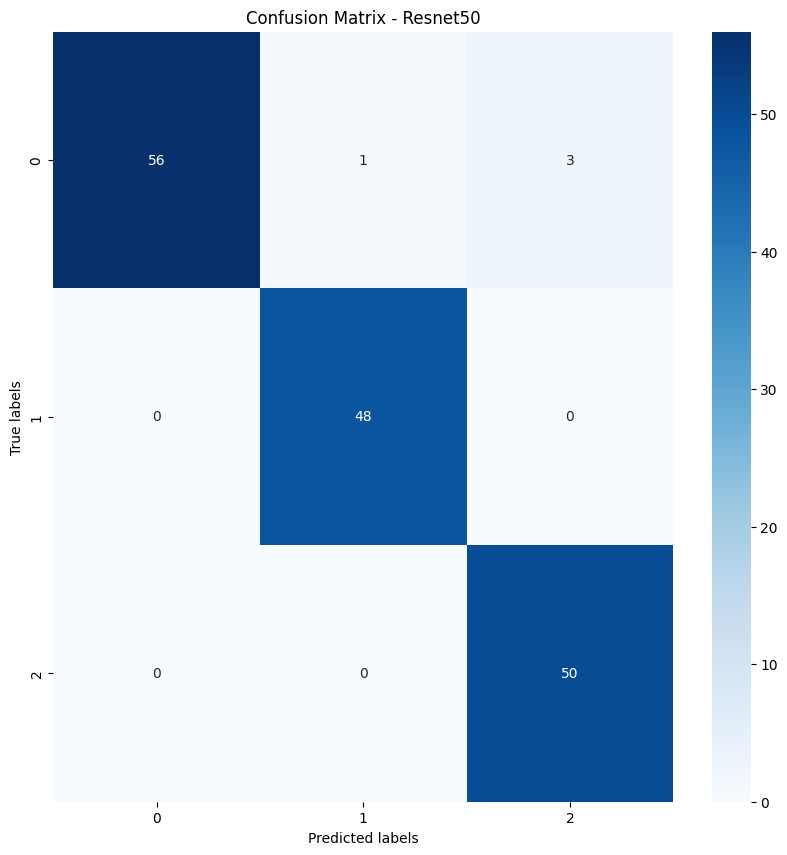

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


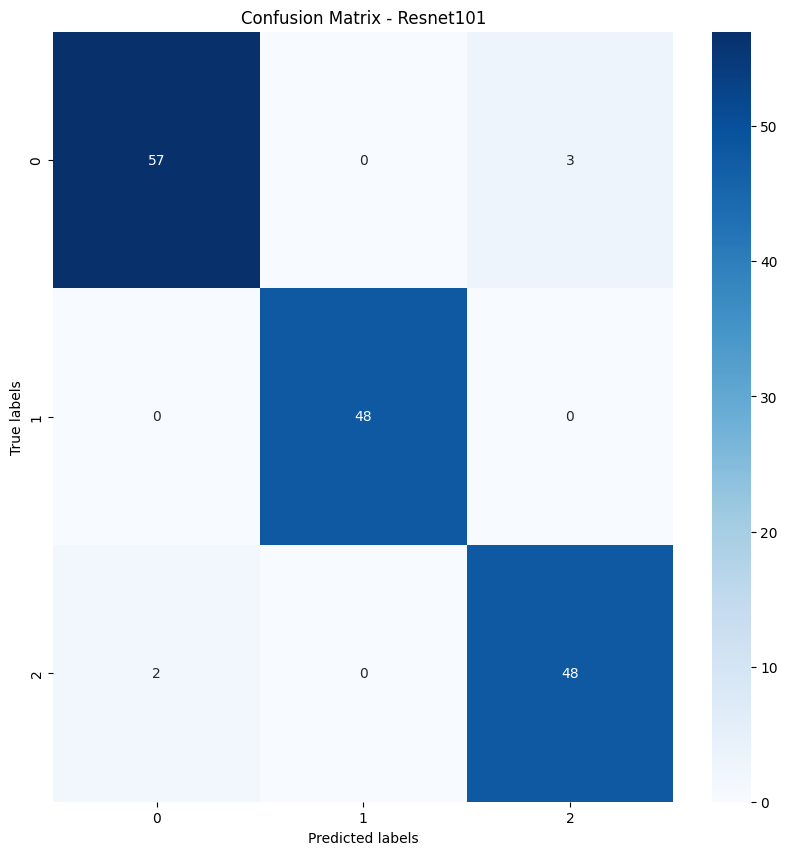

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


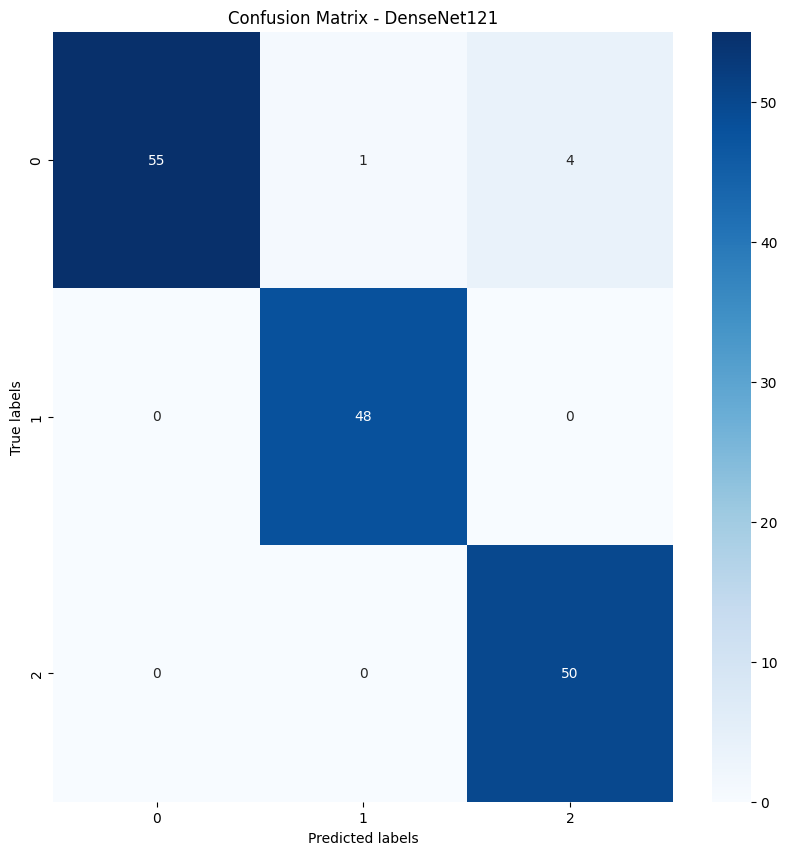

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


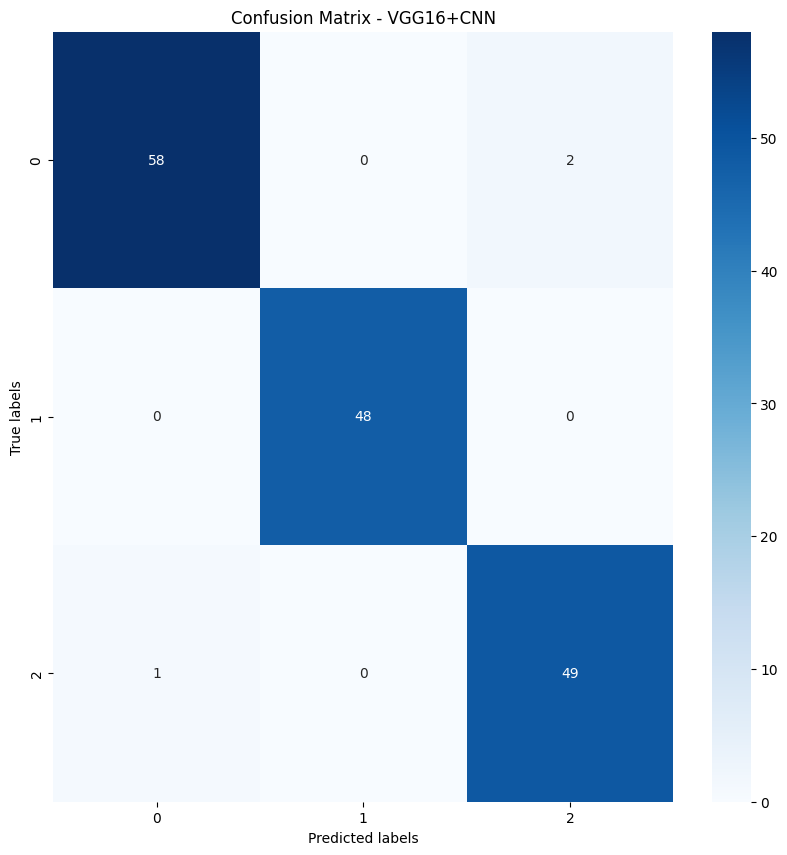

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


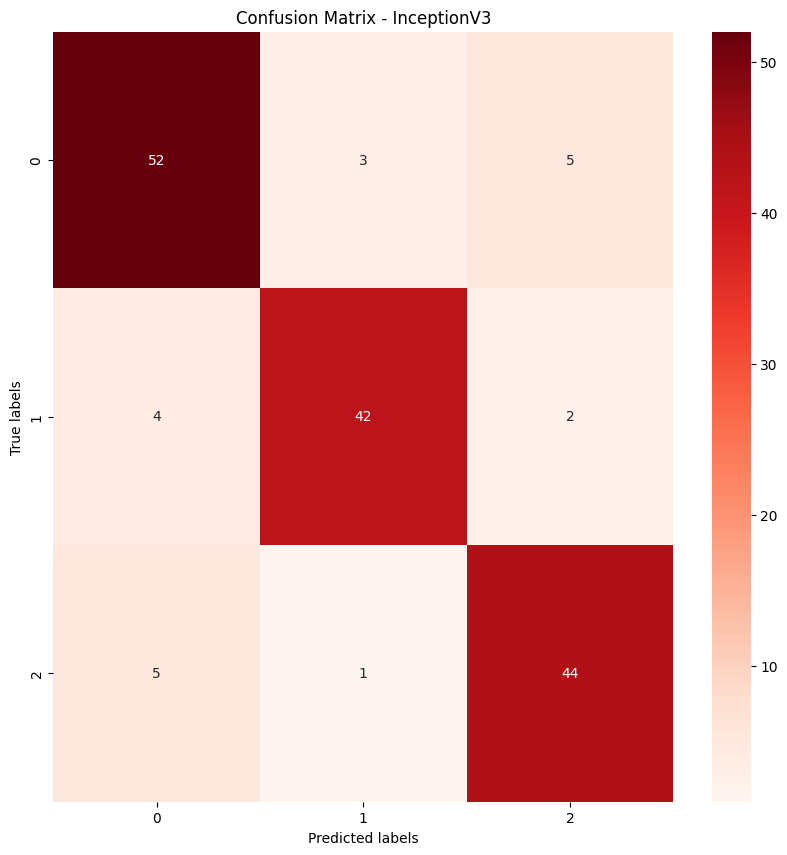

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


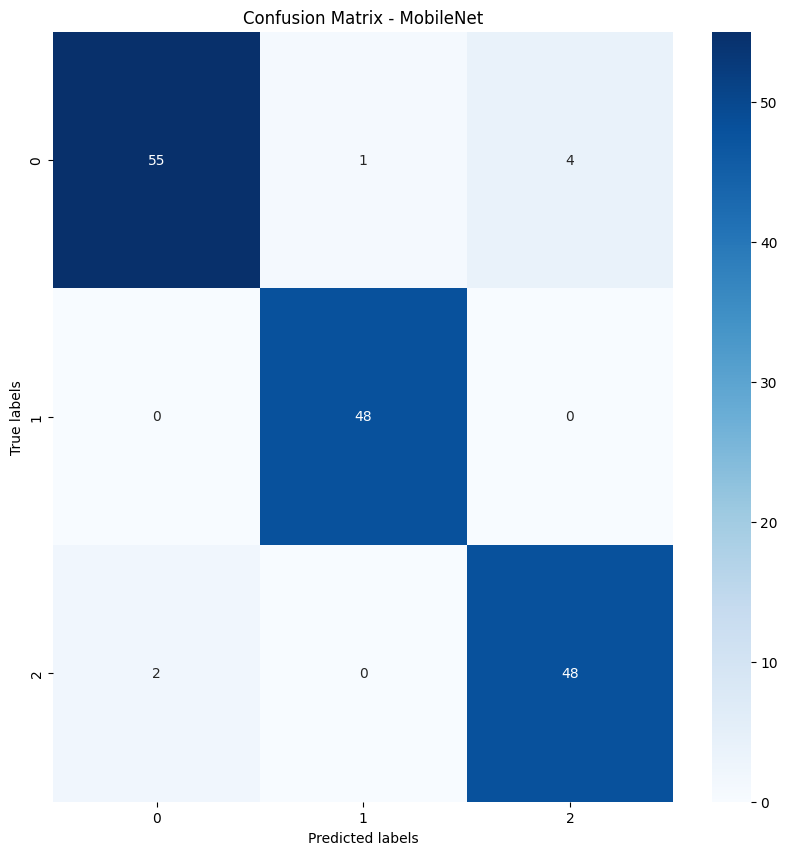

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


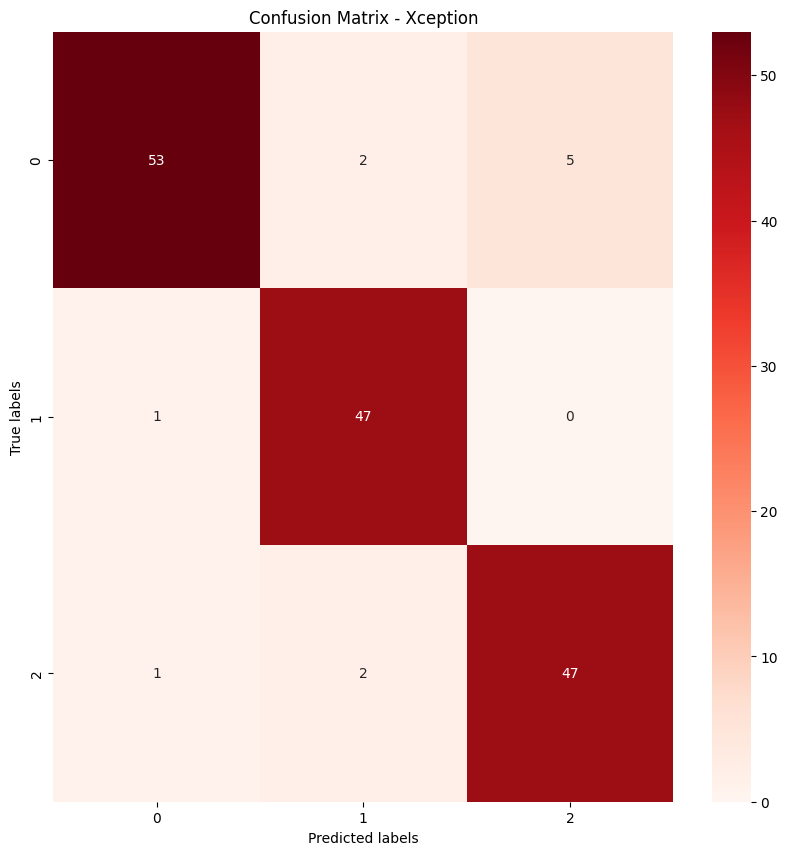

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


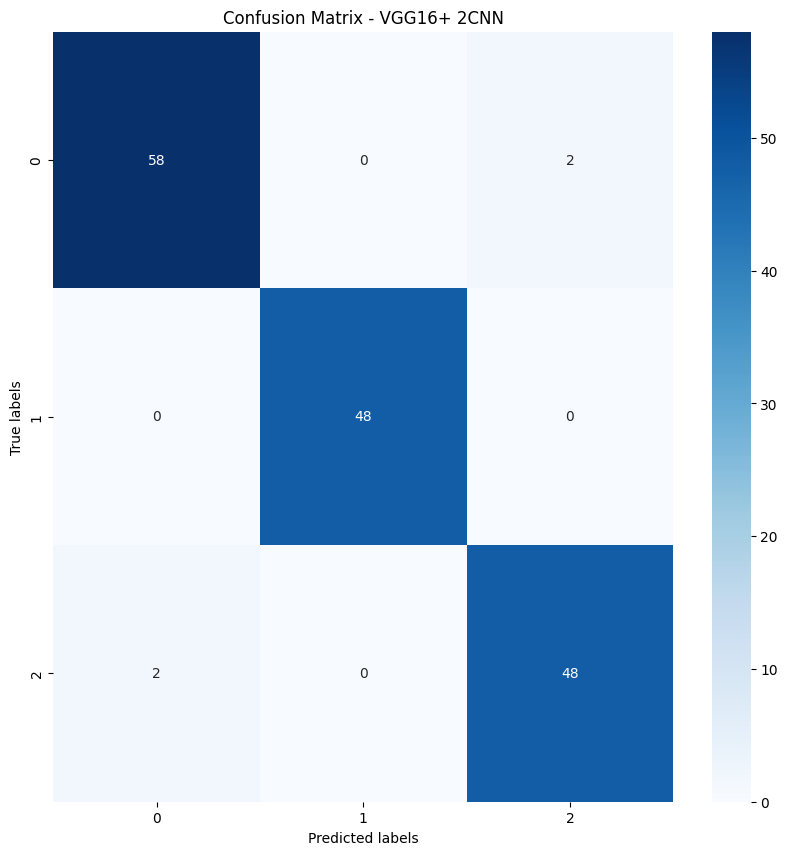

In [43]:
for i in models:
    plot_number = plot_number+1
    plt.figure(figsize=(10, 10))
    plot_confusion_matrix(i)